In [1]:
import np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from spacy import displacy

In [2]:
df = pd.read_csv("datagen/nytimes/pseudo.csv")
df

,text,label,score,start,end,source
0,In 2019 a wave of anti-abortion laws swept thi...,Evidence,0.983720,0,528,abortion-florida-15-week-ban
1,Though most of these laws were quickly blocked...,Evidence,0.934319,528,908,abortion-florida-15-week-ban
2,"Three years later, American reproductive right...",Evidence,0.622358,908,1214,abortion-florida-15-week-ban
3,"It might seem curious, then, that legislators ...",Evidence,0.946866,1214,1722,abortion-florida-15-week-ban
4,One of this year’s unmistakable trends in anti...,Evidence,0.991869,1722,2394,abortion-florida-15-week-ban
...,...,...,...,...,...,...
3893,And boy did it come,Claim,0.982928,2554,2573,yosemite-falls
3894,But the record rains will not end California’s...,Rebuttal,0.880377,2573,2636,yosemite-falls
3895,"Last week, Gov. Gavin Newsom extended the stat...",Claim,0.541481,2636,2769,yosemite-falls
3896,This has been California’s second driest year ...,Evidence,0.479049,2769,2925,yosemite-falls


In [3]:
df.text[0]

'In 2019 a wave of anti-abortion laws swept this country — a common enough event in the United States, where hundreds of such laws have passed during the last decade. But these grabbed the public’s attention in a way many others hadn’t. Georgia banned abortion after about six weeks of pregnancy, or about two weeks after a missed menstrual period. Ohio, Mississippi, Louisiana and Kentucky did the same, while Missouri banned the procedure at eight weeks. Alabama went the furthest, banning virtually all abortions in the state.'

In [4]:
df.groupby("source").score.mean().sort_values()

source
ukraine-russia-us-troops                  0.531266
uc-berkeley-admissions-court-ruling       0.585473
apple-face-computers                      0.597108
smartphones-iphone-android                0.612055
ezra-klein-podcast-alex-tabarrok          0.622424
                                            ...   
babies-work-meeting                       0.931796
oddity-ceramics-surrealism-art            0.939738
flight-attendants-covid                   0.944585
rokia-kone-jacknife-lee-bamanan-review    0.944797
wall-street-hotel                         0.966689
Name: score, Length: 159, dtype: float64

In [5]:
test = df[df.source=='ukraine-russia-us-troops']
doc = {
    "text": test.text.sum(),
    "ents": [dict(start=int(row["start"]), end=int(row["end"]), label=row["label"]) for i, row in test.iterrows()],
}

labels = ['Lead', 'Position', 'Evidence', 'Claim', 'Concluding Statement', 'Counterclaim', 'Rebuttal']
colors = ["#ACDDDE", "#CAF1DE", "#E1F8DC", "#FEF8DD", "#FFE7C7", "#F7D8BA", "#D6CDEA"]
options = {"ents": labels, "colors": dict(zip(labels, colors))}
displacy.render(doc, style="ent", options=options, manual=True, jupyter=True)
print('\n\n')

In [6]:
df.groupby("source").score.mean().mean()

0.7670386684061288

In [7]:
df.score.describe()

count    3898.000000
mean        0.760480
std         0.197714
min         0.217844
25%         0.594941
50%         0.807805
75%         0.945076
max         0.995302
Name: score, dtype: float64

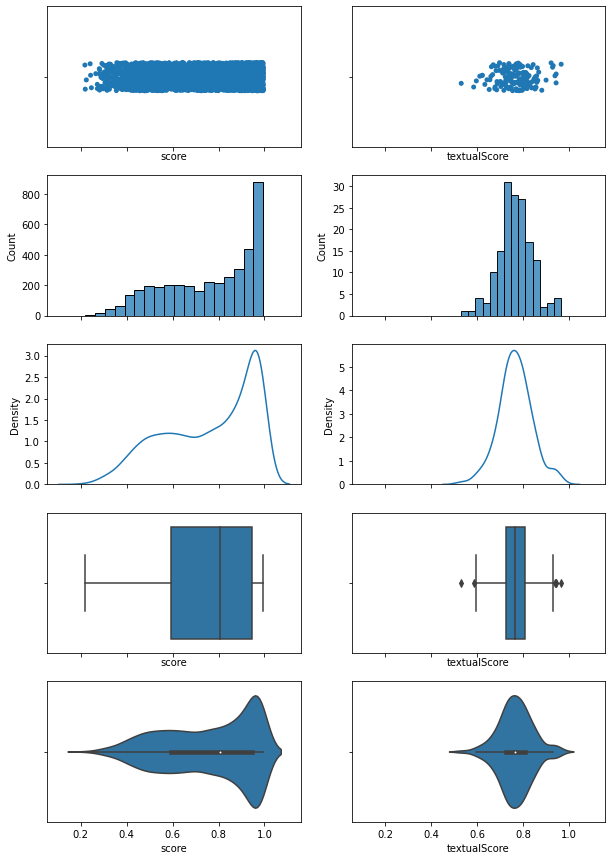

In [8]:
f, axes = plt.subplots(5,2, figsize=(10,15), sharex=True)

for i,f in enumerate([sns.stripplot, sns.histplot, sns.kdeplot, sns.boxplot, sns.violinplot]):
    for j,d in enumerate([df.score, df.rename(columns=dict(score="textualScore")).groupby("source").textualScore.mean()]):
        f(x=d, ax=axes[i, j])

In [9]:
df.groupby("source").score.mean().reset_index()[["score"]].rename(columns={"score":"textualScore"})

,textualScore
0,0.813205
1,0.685687
2,0.809620
3,0.800835
4,0.731424
...,...
154,0.772159
155,0.844647
156,0.714356
157,0.670670


In [10]:
df

,text,label,score,start,end,source
0,In 2019 a wave of anti-abortion laws swept thi...,Evidence,0.983720,0,528,abortion-florida-15-week-ban
1,Though most of these laws were quickly blocked...,Evidence,0.934319,528,908,abortion-florida-15-week-ban
2,"Three years later, American reproductive right...",Evidence,0.622358,908,1214,abortion-florida-15-week-ban
3,"It might seem curious, then, that legislators ...",Evidence,0.946866,1214,1722,abortion-florida-15-week-ban
4,One of this year’s unmistakable trends in anti...,Evidence,0.991869,1722,2394,abortion-florida-15-week-ban
...,...,...,...,...,...,...
3893,And boy did it come,Claim,0.982928,2554,2573,yosemite-falls
3894,But the record rains will not end California’s...,Rebuttal,0.880377,2573,2636,yosemite-falls
3895,"Last week, Gov. Gavin Newsom extended the stat...",Claim,0.541481,2636,2769,yosemite-falls
3896,This has been California’s second driest year ...,Evidence,0.479049,2769,2925,yosemite-falls
